Forecast Evaluator

This notebook will serve as the outline for determining which NHL fantasy forecast magazine is most effective at predicting actual results.

Eventually, I would like to make this customizable to simultaneously evaluate prediction models for a wide array of statistics (Goals, Assists, Points, Powerplay points, Shorthanded points, etc...) and even for multiple positions (Forward, Dmen, Goalies, Center, Winger, etc...) over multiple seasons.

For now, let's keep it simple and stick to skaters (forwards and dmen combined), one prediction source and one single season.

Haven't decided exactly on how I want to quantify the results either, but some ideas:
    - for simplicity, error will be calculated purely by the difference between predicted and actual results
    - later if I decide it will be necessary, can introduce more complex error calculations
    - results will remain separate for skaters and goalies
    - create a graphical distribution (x-axis will be actual results, y-axis will be error) to see if predictions are more or less effective depending on the overall total production rate.

Let's get started:

General outline of what I want to get done is:

1) Import Data (data will be stored in csv files)
    - Prediction data
    - Actual results data
2) Calculate error for each player - include a mechanism to determine any players that an error is not calculated for

3) Calculate overall error in desired format (overall, by position, by team, by conference, etc...)

4) Output results in desired format

Let's get started with a few libraries that I may or may not use, we can get rid of the unnecessary ones later.

In [60]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import math

Let's define a couple functions to import the necessary data from csv files.  

Initially I'll only be comparing predictions and results for a single year, so a function might not be necessary, but, eventually, I want to be able to copmare multiple years.

Let's start with the prediction data:

In [61]:
def loadpredictions(season):
    
    #season will be an interger definining the starting year for the season we are evaluating.  For example, if we are looking at the 2011-2012 season, we would use 2011 here.
    
    filename = '%s_Predictions.csv' % season
    results = np.array(pd.read_csv(filename,header=None))
    
    return results

#we will start off testing for the 2011-2012 season, so season will be 2011
season = 2011


#let's try it out
predictions = loadpredictions(season)

#there will be ALOT of players predictions so let's just check the size of the import data and the first few lines
print (predictions.shape)

print(predictions[:4,:])





(204, 8)
[['Last Name' 'First Name' 'Full Name' 'Team' 'Pos' 'Hockey News' 'Poolers'
  'Forecaster']
 ['Suter' 'Ryan' 'Ryan Suter' 'NSH' 'D' '34' '43' '44']
 ['Sutter' 'Brandon' 'Brandon Sutter' 'CAR' 'F' '34' '42' '42']
 ['Pronger' 'Chris' 'Chris Pronger' 'PHI' 'D' '35' '45' '44']]


Results as expected:
2011_Predictions.csv contains a header row and 203 player predictions (there are 8 categories/columns too)

Looking at the first few lines, we can see the data for these players seems to be imported correctly as well.

Now a function for the actual results data:

Actual results data are currently stored in a single file for all seasons

In [62]:
def loadstats(position):
    
    #position will be a string defining which positional stats we want to bring in, skater or goalie
    
    filename = 'NHL_%s_stats_2011-2016.csv' % position
    results = np.array(pd.read_csv(filename,header=None))
    
    return results

#let's try it out for skaters
position = 'skater'
stats = loadstats(position)

#again, very large amount of players so let's just check the size of the import and the first few lines

print (stats.shape)
print (stats[:4,:])


(4412, 24)
[['Season' 'Assists' 'FaceoffWinPctg' 'GameWinningGoals' 'GamesPlayed'
  'Goals' 'OTGoals' 'PenaltyMinutes' 'PlayerFirstName' 'PlayerId'
  'PlayerLastName' 'PlayerName' 'PlayerPositionCode' 'PlusMinus' 'Points'
  'PPGoals' 'PPPoints' 'SHGoals' 'SHPoints' 'ShiftsPerGame' 'ShootingPctg'
  'Shots' 'TeamAbbrev' 'TimeOnIcePerGame']
 ['20112012' '19' '0' '0' '80' '5' '0' '66' 'Luca' '8474579' 'Sbisa'
  'Luca Sbisa' 'D' '-5' '24' '0' '3' '0' '0' '21.5' '0.0568' '88' nan
  '1075.7625']
 ['20112012' '0' '1' '0' '23' '1' '0' '37' 'Aaron' '8475619' 'Volpatti'
  'Aaron Volpatti' 'L' '-2' '1' '0' '0' '0' '0' '13.6086' '0.0588' '17' nan
  '538.1304']
 ['20112012' '31' '0.4375' '4' '92' '43' '2' '34' 'Alex' '8471214'
  'Ovechkin' 'Alex Ovechkin' 'L' '-10' '74' '15' '27' '0' '0' '21.4782'
  '0.1218' '353' nan '1188.4891']]


Again, results as expected.

Now let's do some comparing of predicted versus actual results.  Again, even though we are starting off looking at only one season, let's use a function so that we can expand to evaluate multiple seasons later down the road.

In [63]:
def compare (season,predicted,actual):

    #season is an integer indicated which year we are comparing
    #predicted will be the array of predicted results
    #actual will be the array of actual results

    #initialize and empty array for our results table
    results = [['Name','Team','Position','Actual Results','Predicted Results','Error']]
    
    #modify our season input to suit the formatting of the actual results array
    year = season*10000 + season + 1
    
    #let's create a loop so that we look up every prediction and compare it to every actual result
    #let's forget about what to do about player predictions that we cannot find a result for (at least for now)
    
    for i in range(1,len(predicted)):
        
        # let's load some basic about the player info into some variables to possibly output later
        FullName = predicted[i,2]
        Team = predicted[i,3]
        Position = predicted[i,4]
        guesspoints = int(predicted[i,5])
        
        for j in range(1,len(actual)):
            
            if int(actual[j,0]) == year and FullName == actual[j,11]:
                Points = int(actual[j,14])
                Error = guesspoints - Points
                results.append([FullName,Team,Position,Points,guesspoints,Error])
        
    return results

#let's see what some of the results look like and how many players it found results for
ErrStats = np.asarray(compare(season,predictions,stats))

print (ErrStats.shape)
print (ErrStats[:4,:])


(188, 6)
[['Name' 'Team' 'Position' 'Actual Results' 'Predicted Results' 'Error']
 ['Ryan Suter' 'NSH' 'D' '50' '34' '-16']
 ['Brandon Sutter' 'CAR' 'F' '32' '34' '2']
 ['Chris Pronger' 'PHI' 'D' '12' '35' '23']]


Interesting, we only have 188 error results when we had 204 predictions.  Let's try and figure out what happened with a new function.

This isn't really that important to the overall functionality but it will be useful to know this information later when we want to get as many datapoints as possible in the final results.

In [64]:
def missing (season,predicted, actual):
    
    #season is an interger indicated which year we are comparing
    #predicted will be the array of predicted results
    #actual will be the array of actual results
    
    #initialize a list to tally any players that have predictions but cannot find a result
    players = []
    
    #modify our season input to match the formatting of the actual results array
    year = season*10000+season+1
    
    #let's create a loop to look for every player in the prediction table in the result table
    #if we find a predicted player in the results we will skip to the next predicted player
    #if we do not find a predicted player then we will add it to the player list
    
    for i in range(1,len(predicted)):
        
        #since we are only worried about finding which players are missing, let's just load the player name
        FullName = predicted[i,2]
        
        # switch to determine if a player is found or not.  0 = not found, 1 = found
        Found = 0
        
        for j in range(1,len(actual)):
            
            if int(actual[j,0]) == year and FullName == actual[j,11]:
                Found = 1
                
        if Found == 0:
            players.append(FullName)
            
    return players

#let's see which players could not be found in the results table
MissedPlayers = np.asarray(missing(season,predictions,stats))

print (len(MissedPlayers))
print (MissedPlayers)
    

16
['Jonathan Huberdeau' 'PA Parenteau' 'Dan Cleary' 'Alex Edler'
 'Nicklas Kronwall' 'PK Subban' 'Tobias Enstrom' 'Derek Brassard'
 'RJ Umberger' 'TJ Oshie' 'Nikolai Kulemin' 'Ryan Clowe' 'Alex Burrows'
 'Danny Briere' 'Alex Semin' 'Martin St Louis']


Well as expected we found 16 missing players.

Looking at the results, it is likely that these are likely as a result of difference in spelling between predictions and results.

Jonathan Huberdeau is maybe Jon Huberdeau
PA Parenteau is maybe P.A. Parenteau
Alex Edler is maybe Alexander Edler
etc...

It is a small enough list that we could probably manually go in and make those spelling corrections but I'm not going to worry about it right now.

Alright, let's get back to our actual goal.

We've now got an array of 188 players complete with the actual results and how far off the prediction was.  This doesn't mean a whole lot in this format, that's still alot of lines writing to look at.

Before going to far, let's remember how we defined the error earlier.

Error = Prediction minus Actual results

So if error is positive, that means the player got less points than expected (underperformed), or the prediction was overestimated.

If the error is negative, that means the player got more points than expected (overachieved), or the prediction was underestimated.

SO...........Let's try and make it a little more visually appealing, let's start with a scatter plot so we can see which direction we want to take this.

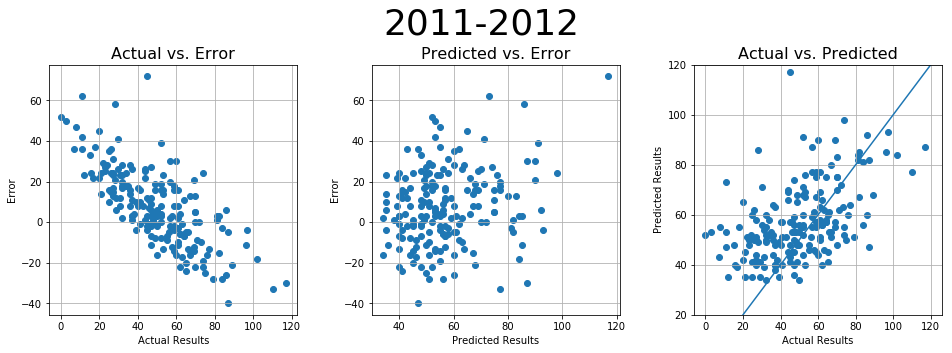

In [65]:
def scatterresults (data, season):

    # data is an array of the information we want to plot
    # data should be input in the following format
    # row 1 is expected to be a header row
    # all subsequent rows should contain data
    # column 0 - Name
    # column 1 - Team
    # column 2 - Position
    # column 3 - Actual Results
    # column 4 - Predicted Results
    # column 5 - Error
    
    # season is an integer marking the starting year of the season we are evaluating
    # example: if season = 2011, we are looking at the 2011-2012 season
    
    # plot actual results versus the error

    fig1 = plt.figure(figsize=(16,5))
    ax = fig1.add_subplot(1,3,1)
    ax.scatter(data[1:,3],data[1:,5])
    plt.xlabel('Actual Results')
    plt.ylabel('Error')
    plt.title('Actual vs. Error', fontsize=16)
    plt.grid(True)



    # plot predicted results versus the error


    ay = fig1.add_subplot(1,3,2)
    ay.scatter(data[1:,4],data[1:,5])
    plt.xlabel('Predicted Results')
    plt.ylabel('Error')
    plt.title('Predicted vs. Error', fontsize=16)
    plt.grid(True)



    # plot actual versus predicted

    az = fig1.add_subplot(1,3,3)
    az.scatter(data[1:,3],data[1:,4])
    az.plot([0,50,120],[0,50,120])
    plt.ylim(20,120)
    plt.xlabel('Actual Results')
    plt.ylabel('Predicted Results')
    plt.title('Actual vs. Predicted', fontsize=16)
    plt.grid(True)

    fig1.suptitle(str(season) + '-' + str(season+1), fontsize=36)
    fig1.subplots_adjust(top=0.82,wspace=0.3)
    plt.show()
    
    return


scatterresults(ErrStats,season) # function spits out the plots automatically


Well that's kinda cool!

We can see a few things here:

Before we analyze too much, let's remember that we are using archived data from forecast magazines.  The majority of this archived data is only for "relevant fantasy" players.  So we have to take some of the results with a little bit of a grain of salt.

Actual vs. Error:
    - there seems to be a clear downward trend for the prediction error as the actual player performance increases
    - trendline seems to show:
        - players around the 50 point range are generally predicted pretty well
        - players below 50 points are generally overestimated or better said they underperformed relative to expectations (makes sense since injuries, bad seasons, expected breakouts that just don't happen)
        - players above the 50 point range are generally underestimated (again, makes sense since we can have career years, unexpected breakouts, etc...)
        
Actual vs. Predicted:
    - pretty self explanatory
    - the 1:1 line is the prediction error = 0 line OR predicted = actual result, this makes it very clear to see if results are over or underestimated
        - over the line means the predicted is higher than the actual, therfore overestimated
        - under the line means the predicted is less than the actual, therefore underestimated
    - seem to see a similar trend where overestimates are more common at lower actual production levels and underestimates are more common at higher actual production levels
    
While the above is interesting, it doesn't really help us since it seems to give a fairly intuitive result that an average person could probably deduce even without this data.  It is nice to have the validation though.

The problem now is that for the first two plots discussed above, we are making conclusions based on results that have already happened.  What would be really interesting to know is if we can make any conclusions before they happen.

Enter the middle plot, Predicted vs. Error:
    - at first glance, there does not seem to be much of a trend
    - the only immediately noticeable thing is that as the predicted value goes up, there seems to be fewer instances underestimates relative to instances of overestimates, this would seem to indicate that for the "elite" players, there is a larger risk that actual production levels won't be the same (take Sidney Crosby for example, he got injured for a large portion of the 2011-12 season and only scored 37 points in 22 games, still an excellent production rate, however, nowhere near the predicted 117 points)


Let's try one more thing and try breaking down the results and taking some averages by grouping the amount of players found in different production levels.

Less than 30 points
30-39 points
40-49 points
50-59 points
60-69 points
70-79 points
80-89 points
More than 90 points

We should have everything we need to make these groupings in the errorstats array already.  Just have to go row by row and filter the players into the appropriate groups to keep running averages.  So let's define some functions to help us with this.

In [66]:
# gonna need this for a later function

# define a function to decide which group we are working in
# as it currently stands, another function 'groups' will exclusively be using this function
    
def pickgroup(score,limits):
    
    # score is the point total we are looking to sort into a particular group
    # note: as it currently stands, while score is a numerical value, it is actually stored as a string
    # so we need to convert score into an integer for sorting purposes
    
    # limits is a list of all the cutoff points for each grouping (this list is generated in the 'groups' function)
    # note: if we have 'n' cutoff points, then we have 'n+1' groups
    # the 'limits' list should already be sorted from lowest to highest
    
    # first let's check the case that the score is above all of the established cutoffs
    
    if int(score) >= limits[len(limits)-1]:
        index = len(limits)
        return index
    else:
        
        # now let's iterate through the cutoffs starting with the lowest one and working our way up
        # if the score is below the current cutoff being compared, then we have found the group
        # and we return the index value
        
        for i in range(0,len(limits)):
            if int(score) < limits[i]:
                index = i
                return index
    return        

In [67]:
# gonna need these for a later function as well
# define two functions to determine the lowest and highest values

def lowest(test,current):
    
    if test < current:
        return test
    else:
        return current

def highest(test,current):
    
    if test > current:
        return test
    else:
        return current


OK, now that we've defined a few helper functions, let's dig into the meat and potatoes and start grouping all of these players 

In [68]:
def groups (data,sourcetype):
    
    #data is an array of the results that we would like to group
    #sourcetype will determine whether we are grouping actual results or predicted results
    
    #define an index based on the type of results we are grouping so that we can appropriately index
    #the input data for the correct information
    if sourcetype == 'actual':
        typeindex = 0
    elif sourcetype == 'predicted':
        typeindex = 1
    
    # define the upper and lower limits of the groupings we will use for separating data
    # i've done it this way for simpler changes to the groupings at a later date
    # possibly even prompting the user for feedback to determine what they want real time
    lowlim = 30
    upplim = 90
    step = 10
    loopcount = math.ceil((upplim-lowlim)/step)
    count = 0
    grouplimits = []
    
    while (count <= loopcount):     
        if upplim < (lowlim + count*step):
            grouplimits.append(upplim)
        else:
            grouplimits.append(lowlim + count*step) 
        count += 1
    
    # print (grouplimits) # QC check
    
    
    # create the header row for our function results based on our limits defined above
    resultshead = []
    
    for i in range(0,len(grouplimits)):
        if i == 0:
            resultshead.append('<' + str(grouplimits[i]))      
        else:  
            resultshead.append(str(grouplimits[i-1]) + '-' + str(grouplimits[i]-1))
    
    resultshead.append(str(grouplimits[len(grouplimits)-1]) + '+')
    
    # print(resultshead) # QC check

    
    # We want our final results table to be like this
    # row 1 (0) - header row (already initialized above)
    # row 2 (1) - # of players (count of the number of players in the group)
    # row 3 (2) - cumulative error (sum of the error of all players in the group)
    # row 4 (3) - average error (average error per player in the group)
    # row 5 (4) - min error value (largest underestimate of actual production)
    # row 6 (5) - max error value (largest overestimate of actual production)
    # row 7 (6) - cumulative absolute value error (sum of the error of all players in the group)
    # row 8 (7) - average abs value error
    # row 9 (8) - max error absolute value
    # each column will be a different points grouping (as defined above)
    
    
    #initialize results table
    results = []
    
    # insert the header row into the final table
    results.append(resultshead)
    
    # create the shape of the rest of the rows and intialize all values to zero
    for i in range(0,8):
        temp = []
        for j in range(0,len(resultshead)):
            temp.append(0)
        results.append(temp)  
    
    
    # print (np.asarray(results) # QC check
    
    # now let's sort the Error data into the results table   
    
    # we want to iterate through each player
    
    for i in range(1,len(data)):
       
        # note we start at 1 because the first row (0) in the input 'data' is a header row.
        
        # use a function 'pickgroup' (see below) to identify which column we are working in
        colindex = pickgroup(data[i,3+typeindex],grouplimits)
        
        # now that we know which column we are working in, let's update the results table
        
        # increment the number of players
        results[1][colindex] += 1
        
        # add the cumulative sum of the error
        results[2][colindex] += int(data[i,5])
        
        # update min error (if applicable) - its a simple task that probably doesn't need a funciton but let's use one
        results[4][colindex] = min(int(data[i,5]),results[4][colindex])
        
        # update max error (if applicable) - again simple, probably don't need a function, but let's do it again
        results[5][colindex] = max(int(data[i,5]),results[5][colindex])
        
        # add cumulative sum of the absolute value of error
        results[6][colindex] += abs(int(data[i,5]))
        
        # find the max error (absolute value)
        results[8][colindex] = max(abs(int(data[i,5])),results[8][colindex])
        
        # oops, we forgot the 'average' rows
        # we could keep a running average but really there isn't much value in that
        # so let's just compute it after we have summed and counted all of the players
 
    # like now, let's compute the averages, create a loop to go across all columns of the results table
    
    for i in range(0,len(results[0])):
        
        # let's avoid running into a divide by zero scenario
        # just in case we don't have any players in that particular grouping
        if results[1][i] == 0:
            results[3][i] = 0
            results[7][i] = 0
        else:
            results[3][i] = round(results[2][i] / results[1][i],2)
            results[7][i] = round(results[6][i] / results[1][i],2)
                       

    return results   
    

Alright, let's try using it now.

We'll run it twice, once for actual values and once for predicted values

In [69]:
actualresultgroups = np.asarray(groups(ErrStats,'actual'))
predresultgroups = np.asarray(groups(ErrStats,'predicted'))

print ('Actual Results Groupings')
print (actualresultgroups)
print ()
print ('Predicted Results Groupings')
print (predresultgroups)


Actual Results Groupings
[['<30' '30-39' '40-49' '50-59' '60-69' '70-79' '80-89' '90+']
 ['36' '27' '32' '32' '29' '15' '11' '5']
 ['1034' '416' '299' '158' '-130' '-117' '-125' '-96']
 ['28.72' '15.41' '9.34' '4.94' '-4.48' '-7.8' '-11.36' '-19.2']
 ['0' '-4' '-11' '-16' '-24' '-28' '-40' '-33']
 ['62' '41' '72' '39' '30' '24' '6' '0']
 ['1034' '424' '373' '346' '340' '211' '151' '96']
 ['28.72' '15.7' '11.66' '10.81' '11.72' '14.07' '13.73' '19.2']
 ['62' '41' '72' '39' '30' '28' '40' '33']]

Predicted Results Groupings
[['<30' '30-39' '40-49' '50-59' '60-69' '70-79' '80-89' '90+']
 ['0' '11' '48' '64' '29' '16' '12' '7']
 ['0' '55' '138' '510' '238' '256' '54' '188']
 ['0' '5.0' '2.88' '7.97' '8.21' '16.0' '4.5' '26.86']
 ['0' '-16' '-40' '-28' '-26' '-33' '-30' '-4']
 ['0' '23' '36' '52' '45' '62' '58' '72']
 ['0' '117' '642' '1030' '480' '322' '188' '196']
 ['0' '10.64' '13.38' '16.09' '16.55' '20.12' '15.67' '28.0']
 ['0' '23' '40' '52' '45' '62' '58' '72']]


Woohoo, things are looking good.  Now we just need to make it all look pretty.  Let's build another plotting function.

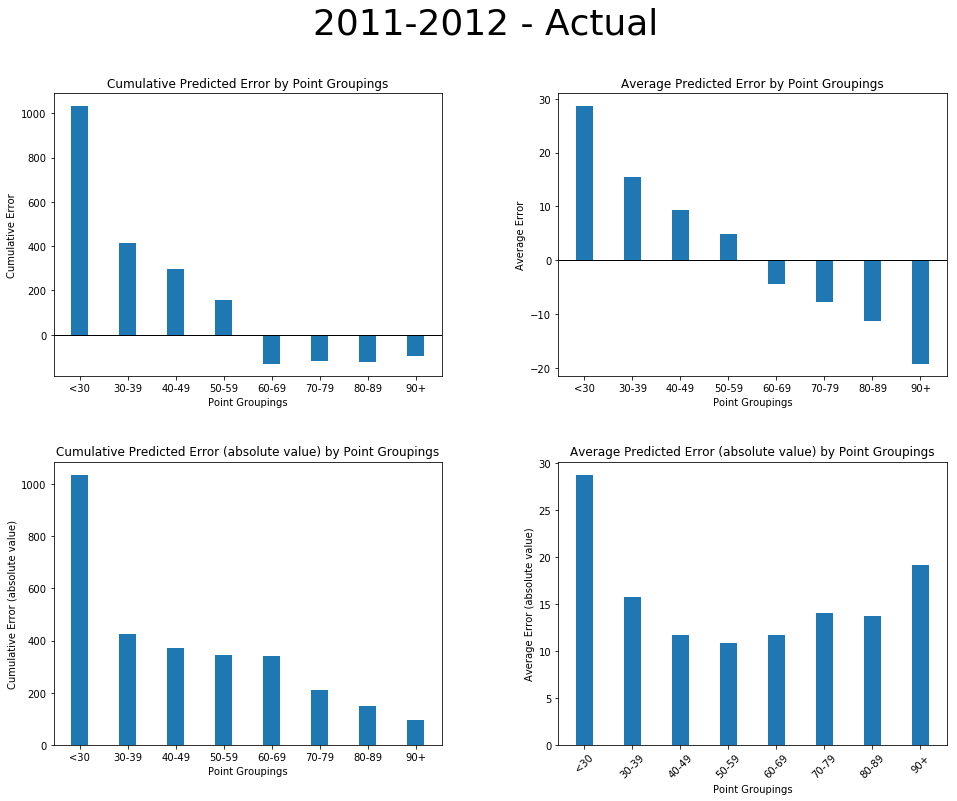

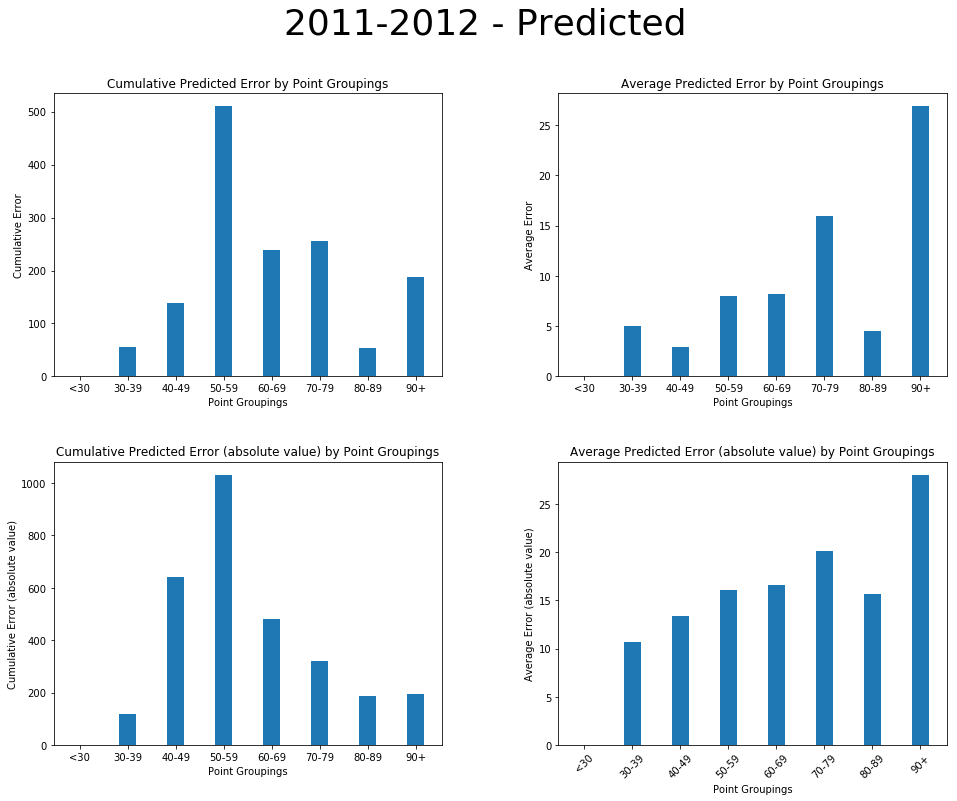

In [80]:
def groupplots (data,season,type):
    
    # data is an array of the information we want to plot
    # data should be input in the following format
    # row 1 (0) - header row (already initialized above)
    # row 2 (1) - # of players (count of the number of players in the group)
    # row 3 (2) - cumulative error (sum of the error of all players in the group)
    # row 4 (3) - average error (average error per player in the group)
    # row 5 (4) - min error value (largest underestimate of actual production)
    # row 6 (5) - max error value (largest overestimate of actual production)
    # row 7 (6) - cumulative absolute value error (sum of the error of all players in the group)
    # row 8 (7) - average abs value error
    # row 9 (8) - max error abs value
    # each column is a different scoring group
    
     # season is an integer marking the starting year of the season we are evaluating
    # example: if season = 2011, we are looking at the 2011-2012 season
    
    # plot actual results versus the error
    
    N = len(data[1]) # the number of locations for the groups
    ind = np.arange(N) # the x locations for the groups
    width = 0.35 # width of the bars
    
    xticks = [' '] # labels for the ticks on the x-axis bar graph
    for i in range(0,len(data[0])):
        xticks.append(data[0,i])

    
    fig1 = plt.figure(figsize=(16,12))
    
    # let's plot the cumulative error first
    ax1 = fig1.add_subplot(2,2,1)
    ax1.bar(ind, data[2,:], width) # cumulative error
    ax1.set_title('Cumulative Predicted Error by Point Groupings', fontsize=12)
    ax1.set_xlabel('Point Groupings')
    ax1.set_xticklabels(xticks)
    ax1.set_ylabel('Cumulative Error')
    ax1.axhline(y=0, linewidth=1, color='k')
    
    
    # now let's plot the average error beside it
    ax2 = fig1.add_subplot(2,2,2)
    ax2.bar(ind, data[3,:], width) # average error
    # ax2.plot(ind,data[5,:], color='r') # max error
    # ax2.plot(ind,data[4,:], color='g') # min error (or technically, max negative error)
    ax2.set_title('Average Predicted Error by Point Groupings', fontsize=12)
    ax2.set_xlabel('Point Groupings')
    ax2.set_xticklabels(xticks)
    ax2.set_ylabel('Average Error')
    ax2.axhline(y=0, linewidth=1, color='k')
   
    
    # let's plot the cumulative error but with absolute values this time
    ay1 = fig1.add_subplot(2,2,3)
    ay1.bar(ind, data[6,:], width) # cumulative error absolute value
    ay1.set_title('Cumulative Predicted Error (absolute value) by Point Groupings', fontsize=12)
    ay1.set_xlabel('Point Groupings')
    ay1.set_xticklabels(xticks)
    ay1.set_ylabel('Cumulative Error (absolute value)')
    
    
    # let's plot the average error but with absolute values
    ay2 = fig1.add_subplot(2,2,4)
    ay2.bar(ind, data[7,:], width) # average error absolute value
    # ay2.plot(ind,data[8,:], color='r') # max error absolute value
    ay2.set_title('Average Predicted Error (absolute value) by Point Groupings', fontsize=12)
    ay2.set_xlabel('Point Groupings')
    ay2.set_xticklabels(xticks, rotation=45)
    ay2.set_ylabel('Average Error (absolute value)')
    
    
    fig1.suptitle(str(season) + '-' + str(season+1) + " - " + type, fontsize=36)
    fig1.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()
    
    return

groupplots(actualresultgroups,season,'Actual')
print ()
groupplots(predresultgroups,season,'Predicted')

And there we have it, a way to compare the forecasted results to the actual results for a single NHL season (well for skaters at least, we kind of strayed away from the goalies as we went but that's ok, we can tackle that in the next iteration).